In [43]:
import pandas as pd

In [44]:
data=pd.read_csv('Data.csv')

In [45]:
X=data.drop(['gnd'],axis=1)
y=data['gnd']

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
Variance=VarianceThreshold(0.4)
best_fit=Variance.fit_transform(X_train,y_train)

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [79]:
X_selected_features=Variance.transform(X_train)
X_test_selected=Variance.transform(X_test)

In [84]:
import numpy as np
from sklearn.decomposition import PCA
#X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

#print(X_train.shape)
#Var_list=[]
for i in (2,4,10,30,40):
    pca = PCA(n_components=i)
    fit=pca.fit(X_selected_features)
    
    X_transform = fit.transform(X_selected_features)
    print (X_transform.shape)
    print(pca.explained_variance_ratio_) 

#print(pca.singular_values_)  

# from sklearn.decomposition import PCA
# for i in range(5):
#     pca = PCA(n_components=i)
#     X_train = pca.fit(X_train)
# #     X_train = pca.transform(X_train)
# #     X_test = pca.transform(X_test)
# #     #print(X_train.shape)

(560, 2)
[9.99602169e-01 2.10927116e-04]
(560, 4)
[9.99602169e-01 2.10927116e-04 4.72984653e-05 2.89822411e-05]
(560, 10)
[9.99602169e-01 2.10927116e-04 4.72984653e-05 2.89822411e-05
 1.69581460e-05 1.54244714e-05 1.17161256e-05 1.09384235e-05
 9.27708754e-06 8.28257735e-06]
(560, 30)
[9.99602169e-01 2.10927116e-04 4.72984653e-05 2.89822411e-05
 1.69581460e-05 1.54244714e-05 1.17161257e-05 1.09384235e-05
 9.27708760e-06 8.28257772e-06 6.09451158e-06 4.97405621e-06
 3.89391114e-06 2.95585799e-06 2.76494957e-06 2.25247809e-06
 2.01528210e-06 1.81146046e-06 1.62453259e-06 1.47365553e-06
 1.18069300e-06 1.01274495e-06 8.80916904e-07 7.83476318e-07
 6.10723728e-07 5.43843186e-07 4.57691854e-07 3.92507549e-07
 3.47962324e-07 2.90986343e-07]
(560, 40)
[9.99602169e-01 2.10927116e-04 4.72984653e-05 2.89822411e-05
 1.69581460e-05 1.54244714e-05 1.17161257e-05 1.09384235e-05
 9.27708760e-06 8.28257772e-06 6.09451158e-06 4.97405621e-06
 3.89391114e-06 2.95585799e-06 2.76494957e-06 2.25247809e-06
 

In [54]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[62  0  0  0]
 [ 0 62  0  1]
 [ 0  0 43  8]
 [ 0  0 25 39]]


0.8583333333333333

In [42]:
df=pd.DataFrame(pca.explained_variance_ratio_)
df

,0
0,9.987795e-01
1,4.347666e-04
2,1.343962e-04
3,1.031302e-04
4,7.414140e-05
5,6.285339e-05
6,4.412863e-05
7,3.868101e-05
8,3.153430e-05
9,2.723094e-05


This gives the change in variance from the 1st PCA componentto 256th PCA component.
We can clearly see that there is 99.87% variance captured in 1st PCA component and drops to 4% in second PCA component and gradually decreases from there on.

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Variance vs PCA')

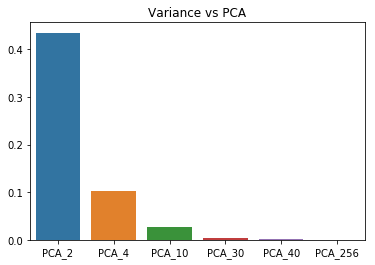

In [51]:
#plt.hist(df[0],bins=10)
#plt.xlim(0.0,1.0)

X=['PCA_2','PCA_4','PCA_10','PCA_30','PCA_40','PCA_256']
Y=([4.347666e-04*1000,1.031302e-04*1000,2.723094e-05*1000,4.056361e-06*1000,2.158321e-06*1000,3.477801e-19*1000])
sns.barplot(X,Y).set_title("Variance vs PCA")


Percentage of variance captured decreases with increase in the number of PCA components.PCA with 2 components 
captures the maximum variance.

In [45]:
Accuracy_score={'PCA2':0.8375,'PCA4':0.9958,'PCA10':0.9625,'PCA30':0.9250,'PCA40':0.9458,'PCA256':0.8583}
Accuracy_score
Colums=['PCA2','PCA4','PCA10','PCA30','PCA40','PCA256']
y=[0.8375,0.9958,0.9625,0.9250,0.9458,0.8583]

Text(0.5, 1.0, 'Accuracy of various PCA components')

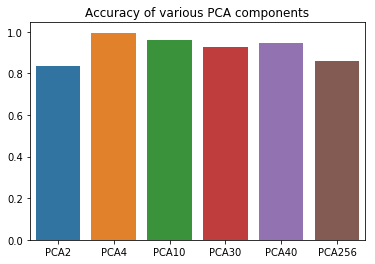

In [46]:
sns.barplot(Colums,y).set_title('Accuracy of various PCA components')

The accuracy of each PCA component remains more or less the same on training the PCA transformed dataset in RandomForest clsssifier.